# HW 8

Mirpulatov Islombek

PHD-1, CDSE

In [28]:
import time
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

## 1. An explanation is given of what is the difference between cupy and numpy. How does cupy handle data transfers between CPU and GPU? (1 point)


* CuPy and NumPy are libraries for numerical computations.
* Numpy is computations on CPU, CuPy computations on GPU.
* Both have the same interface.
* Data handle:

Initialize array in CuPy:

`cp.array([1, 2, 3])`

Move array to a GPU:

`x_cpu = np.array([1, 2, 3])`

`x_gpu = cp.asarray(x_cpu)`

Move array from GPU to CPU:

`x_gpu = cp.array([1, 2, 3])`

`x_cpu = cp.asnumpy(x_gpu)` or ``x_cpu = x_gpu.get()``

## 2. Function saxpy that runs on GPU using cupy is provided. (1 point)

In [29]:
def saxpy_cpu(a, x, y):
    return a * x + y

@cp.fuse()
def saxpy_gpu(a, x, y):
    return a * x + y

In [30]:
alpha = np.random.rand()
M = np.random.rand(3, 3)
N = np.random.rand(3, 3)

In [31]:
alpha_ = cp.asarray(alpha)
M_ = cp.asarray(M)
N_ = cp.asarray(N)

In [32]:
cpu_results = saxpy_cpu(alpha, M, N)

In [33]:
gpu_results = saxpy_gpu(alpha_, M_, N_)
gpu_results = gpu_results.get()

In [34]:
# Check if results are the same

In [35]:
cpu_results

array([[0.79752721, 1.58483348, 0.42806212],
       [1.3417383 , 1.47791527, 1.46851566],
       [0.33141828, 0.9481511 , 1.72370549]])

In [36]:
gpu_results

array([[0.79752721, 1.58483348, 0.42806212],
       [1.3417383 , 1.47791527, 1.46851566],
       [0.33141828, 0.9481511 , 1.72370549]])

## 3.  Graph (OX - size of arrays, OY - computation time) is given. Plot computation time of numpy and cupy implementations of saxpy. (2 points)

In [37]:
size = [50 * i for i in range(1, 201)]

cpu_time = []
gpu_time = []

for s in size:
  alpha = np.random.rand()
  M = np.random.rand(s, s)
  N = np.random.rand(s, s)

  alpha_ = cp.asarray(alpha)
  M_ = cp.asarray(M)
  N_ = cp.asarray(N)

  # Calculate time on CPU
  t = []
  for i in range(10):
    start_time = time.time()
    cpu_results = saxpy_cpu(alpha, M, N)
    end_time = time.time()
    elapsed_time = end_time - start_time
    t.append(elapsed_time)
  t = np.mean(t)
  cpu_time.append(t)


  # Calculate time on GPU
  t = []
  for i in range(10):
    start_time = time.time()
    gpu_results = saxpy_gpu(alpha_, M_, N_)
    end_time = time.time()
    elapsed_time = end_time - start_time
    t.append(elapsed_time)
  t = np.mean(t)
  gpu_time.append(t)

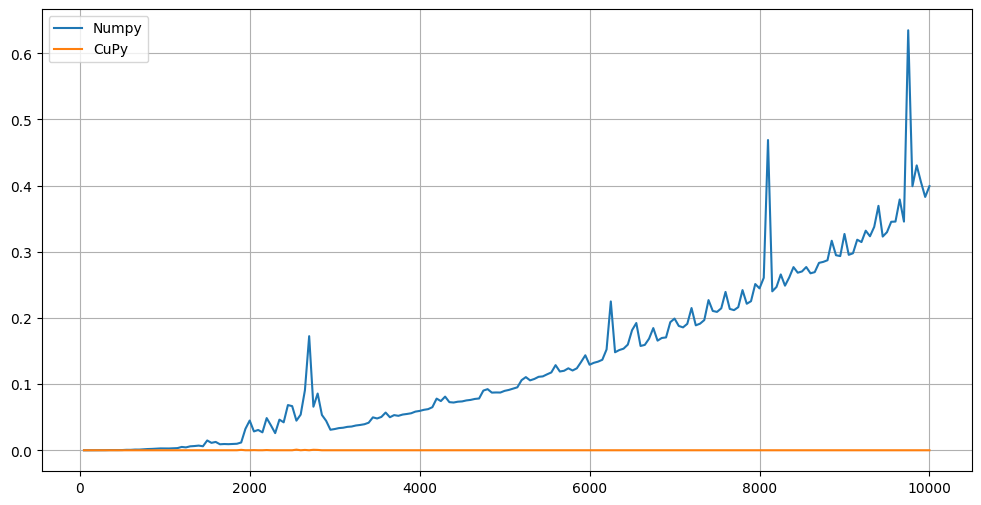

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(size, cpu_time, label='Numpy')
plt.plot(size, gpu_time, label='CuPy')
plt.legend()
plt.grid()

## 4. Bifurcation map is performed using cupy arrays. (2 points)

In [39]:
@cp.fuse()
def logistic_map(x, rate):
    return rate * x * (1 - x)

In [40]:
def plot_biffurication_map(x_0, R, N, M):
    R_ = cp.array([], dtype=cp.float32)
    population = cp.array([], dtype=cp.float32)

    for r in R:
        x = x_0
        for i in range(0, N):
            x = logistic_map(x, r)
        for i in range(0, M):
            x = logistic_map(x, r)
            population = cp.append(population, x)
            R_ = cp.append(R_, r)

    plt.figure(figsize=(14, 7))
    plt.scatter(R_.get(), population.get(), s=0.5)

    # Add labels and title
    plt.xlabel('Rate')
    plt.ylabel('Population')
    plt.grid()

Rate linspace size = 1000
N = 200, M = 200
Inititial x = 0.353836374955296


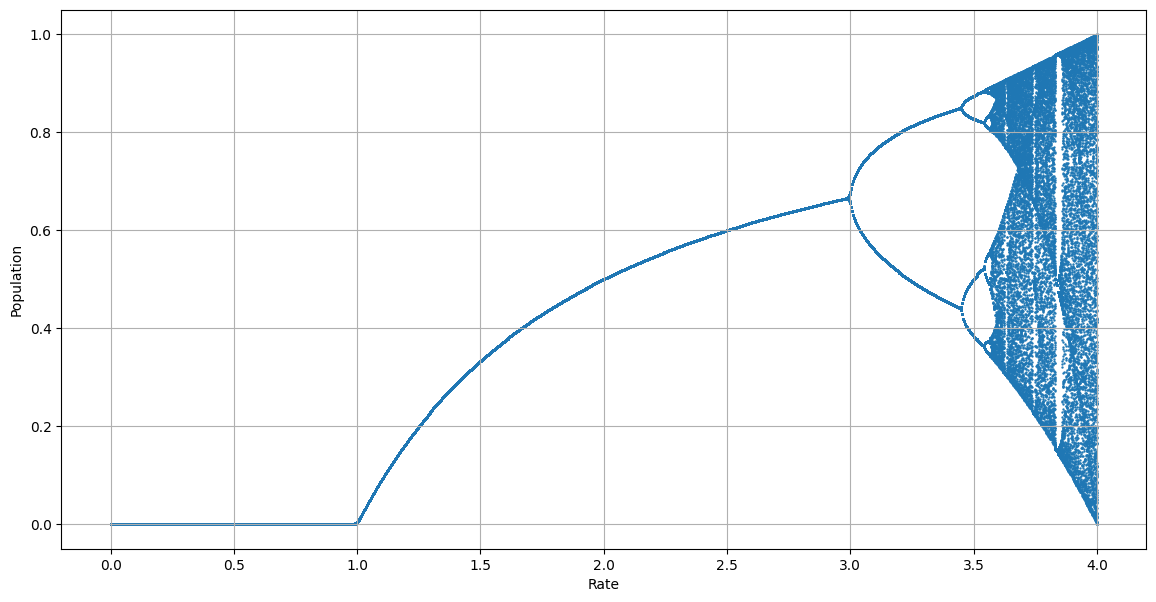

In [41]:
len_r = 1000
N = 200
M = 200
r = cp.linspace(0, 4, len_r, dtype=cp.float32)
x_0 = cp.random.rand()
print(f"Rate linspace size = {len_r}")
print(f"N = {N}, M = {M}")
print(f"Inititial x = {x_0}")
plot_biffurication_map(x_0, r, N, M)

## 5. Graph (OX - number of rs, OY - computation time) is given. Plot computation time of CPU, CPU parallel, and GPU implementations. (2 points)

In [42]:
def logistic_map_CPU(x, rate):
    return rate * x * (1 - x)

def biffurication_map_CPU(x_0, R, N, M):
    R_ = np.array([], dtype=np.float32)
    population = np.array([], dtype=np.float32)

    for r in R:
        x = x_0
        for i in range(0, N):
            x = logistic_map_CPU(x, r)
        for i in range(0, M):
            x = logistic_map_CPU(x, r)
            population = np.append(population, x)
            R_ = np.append(R_, r)

In [43]:
@cp.fuse()
def logistic_map_GPU(x, rate):
    return rate * x * (1 - x)

def biffurication_map_GPU(x_0, R, N, M):
    R_ = cp.array([], dtype=cp.float32)
    population = cp.array([], dtype=cp.float32)

    for r in R:
        x = x_0
        for i in range(0, N):
            x = logistic_map_GPU(x, r)
        for i in range(0, M):
            x = logistic_map_GPU(x, r)
            population = cp.append(population, x)
            R_ = cp.append(R_, r)

In [44]:
N = 200
M = 200

cpu_time = []
gpu_time = []

for i in range(100, 2200, 200):
  r_cpu = cp.linspace(0, 4, i, dtype=np.float32)
  r_gpu = cp.linspace(0, 4, i, dtype=cp.float32)

  x_0_cpu = np.random.rand()
  x_0_gpu = cp.random.rand()

  t0 = time.time()
  biffurication_map_CPU(x_0_cpu, r_cpu, N, M)
  t = time.time() - t0
  cpu_time.append(t)


  t0 = time.time()
  biffurication_map_GPU(x_0_gpu, r_gpu, N, M)
  t = time.time() - t0
  gpu_time.append(t)

In [48]:
%%writefile biffurication.py

from mpi4py import MPI
import numpy as np
import matplotlib.pyplot as plt


def logistic_map(x, rate):
    return rate * x * (1 - x)


def biffurication_map(x_0, R, N, M):
    R_ = np.array([], dtype=np.float32)
    population = np.array([], dtype=np.float32)

    for r in R:
        x = x_0
        for i in range(0, N):
            x = logistic_map(x, r)
        for i in range(0, M):
            x = logistic_map(x, r)
            population = np.append(population, x)
            R_ = np.append(R_, r)


def main():
    N = 200
    M = 200
    for i in range(100, 2200, 200):
      r = np.linspace(0, 4, i)
      x_0 = np.random.rand()


      comm = MPI.COMM_WORLD
      rank = comm.Get_rank()
      size = comm.Get_size()

      r_chunk = np.array_split(r, size)[rank]

      if rank == 0:
        start_time = MPI.Wtime()

      biffurication_map(x_0, r_chunk, N, M)

      if rank == 0:
        end_time = MPI.Wtime()
        t = end_time - start_time
        print(f"R: {i}", "\tSize: ", size, "\tTime elapsed: ", np.round(t, 3))


if __name__ == '__main__':
    main()

Writing biffurication.py


In [51]:
for i in range(1, 5):
  ! mpirun -n {i} --allow-run-as-root --oversubscribe python biffurication.py

R: 100 	Size:  1 	Time elapsed:  0.316
R: 300 	Size:  1 	Time elapsed:  2.35
R: 500 	Size:  1 	Time elapsed:  14.043
R: 700 	Size:  1 	Time elapsed:  28.76
R: 900 	Size:  1 	Time elapsed:  43.662
R: 1100 	Size:  1 	Time elapsed:  61.356
R: 1300 	Size:  1 	Time elapsed:  79.884
R: 1500 	Size:  1 	Time elapsed:  103.95
R: 1700 	Size:  1 	Time elapsed:  129.853
R: 1900 	Size:  1 	Time elapsed:  155.942
R: 2100 	Size:  1 	Time elapsed:  185.913
R: 100 	Size:  2 	Time elapsed:  0.208
R: 300 	Size:  2 	Time elapsed:  1.183
R: 500 	Size:  2 	Time elapsed:  3.398
R: 700 	Size:  2 	Time elapsed:  7.806
R: 900 	Size:  2 	Time elapsed:  18.959
R: 1100 	Size:  2 	Time elapsed:  26.154
R: 1300 	Size:  2 	Time elapsed:  34.139
R: 1500 	Size:  2 	Time elapsed:  45.849
R: 1700 	Size:  2 	Time elapsed:  56.779
R: 1900 	Size:  2 	Time elapsed:  71.795
R: 2100 	Size:  2 	Time elapsed:  80.097
R: 100 	Size:  3 	Time elapsed:  0.277
R: 300 	Size:  3 	Time elapsed:  1.316
R: 500 	Size:  3 	Time elapsed:  2.

In [52]:
ox = list(range(100, 2200, 200))

In [53]:
mpi_1 = [0.316, 2.35, 14.043, 28.76, 43.662, 61.356, 79.884, 103.95, 129.853, 155.942, 185.913]
mpi_2 = [0.208, 1.183, 3.398, 7.806, 18.959, 26.154, 34.139, 45.849, 56.779, 71.795, 80.097]
mpi_3 = [0.277, 1.316, 2.812, 4.633, 8.035, 13.506, 24.352, 31.826, 39.663, 47.411, 55.638]
mpi_4 = [0.203, 0.621, 1.495, 3.399, 5.745, 8.636, 12.197, 19.721, 32.261, 35.765, 44.47]

In [55]:
len(ox), len(mpi_1), len(mpi_2), len(mpi_3), len(mpi_4), len(cpu_time), len(gpu_time)

(11, 11, 11, 11, 11, 11, 11)

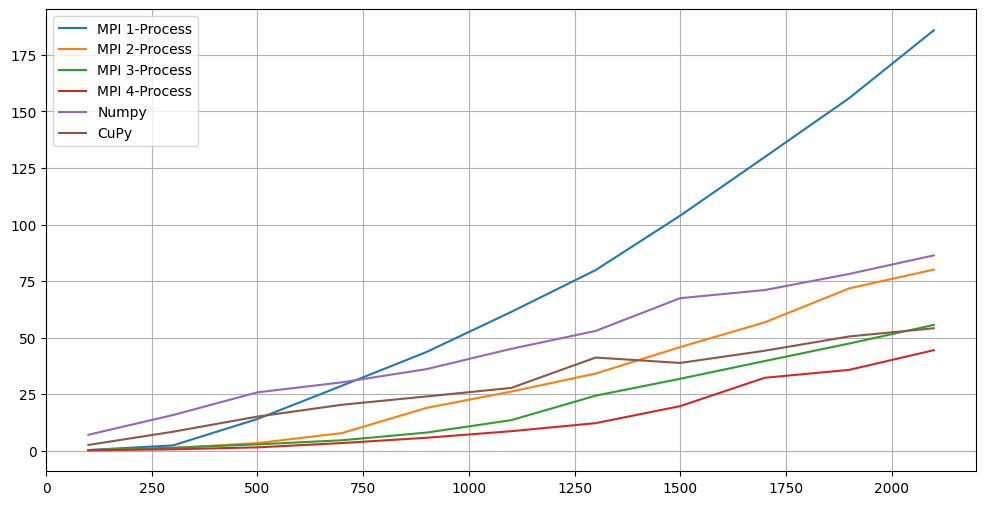

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(ox, mpi_1, label='MPI 1-Process')
plt.plot(ox, mpi_2, label='MPI 2-Process')
plt.plot(ox, mpi_3, label='MPI 3-Process')
plt.plot(ox, mpi_4, label='MPI 4-Process')
plt.plot(ox, cpu_time, label='Numpy')
plt.plot(ox, gpu_time, label='CuPy')
plt.legend()
plt.grid()